In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from pandas import DataFrame
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from pandas.tools.plotting import parallel_coordinates
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import discriminant_analysis
from sklearn import svm
from sklearn import preprocessing

In [2]:
def set_plot_attr(size_X, size_Y):
    %matplotlib inline
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = (size_X, size_Y)

In [3]:
def load_df(csv_name):
    global df
    df = pd.read_csv(csv_name)
    df.ix[:, df.columns!='category'] = preprocessing.MinMaxScaler().fit_transform(df.ix[:, df.columns!='category'])
    print('Shape of the loaded data frame:', df.shape)
    print('\nFirst 5 entries:\n', df.head())

In [4]:
def train_attr(train_col, predict_col):
    global train_X, train_Y
    train_X = DataFrame()
    train_Y = DataFrame()
    train_X = df.iloc[:, train_col]
    train_Y = df.iloc[:, predict_col]

In [5]:
def pred(model_clf):
    global model
    model = model_clf
    model = model.fit(train_X, train_Y)
    print('Model score is:', model.score(train_X, train_Y))

In [6]:
def pred_plot(size, alpha, x, y, color):
    ax = train_X.plot(x = 0, y = 1, kind = "scatter", s = 0)
    count = 0
    for i in np.unique(model.predict(train_X)):
        train_X[model.predict(train_X) == i].plot(x = x, y = y, kind = "scatter", color = color[count],\
                                                  label = "Class " + str(i), s = 100, alpha = 0.5, ax = ax)
        count = count + 1

In [7]:
def project(plane, size, alpha, x, y, color):
    XA1 = np.dot(train_X,plane)
    X1= DataFrame()
    X1['column1']=XA1[:,0]
    X1['column2']=XA1[:,1]
    ax = X1.plot(x = x, y = y, kind = "scatter", s = 0)
    count = 0
    for i in np.unique(model.predict(train_X)):
        X1[model.predict(train_X) == i].plot(x = "column1", y = "column2", kind = "scatter", color = color[count],\
                                                  label = "Class " + str(i), s = 100, alpha = 0.5, ax = ax)
        count = count + 1

In [8]:
def plot_data(size, alpha, x, y, color):
    ax = train_X.plot(x = 0, y = 1, kind = "scatter", s = 0)
    count = 0
    for i in train_Y.unique():
        train_X[df['category'] == i].plot(x = x, y = y, kind = "scatter", color = color[count],\
                                                  label = "Class " + str(i), s = 100, alpha = 0.5, ax = ax)
        count = count + 1

In [9]:
#set plot size
set_plot_attr(size_X = 13, size_Y = 8) 

#load csv
load_df("./winequality-red2.csv")

Shape of the loaded data frame: (1599, 13)

First 5 entries:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.13772

In [10]:
#train data- column numbers, predict data- column number
train_attr((1, 9, 10), 12)

pred(model_clf = LogisticRegression())
#pred(model_clf = RandomForestClassifier(n_estimators=100))
#pred(model_clf = tree.DecisionTreeClassifier(max_depth = 100))
#pred(model_clf = discriminant_analysis.LinearDiscriminantAnalysis())
#pred(model_clf = discriminant_analysis.QuadraticDiscriminantAnalysis())
#pred(model_clf = svm.SVC(kernel = 'linear', probability = True))
#pred(model_clf = svm.SVC(kernel = 'rbf', probability = True))

Model score is: 0.731081926204


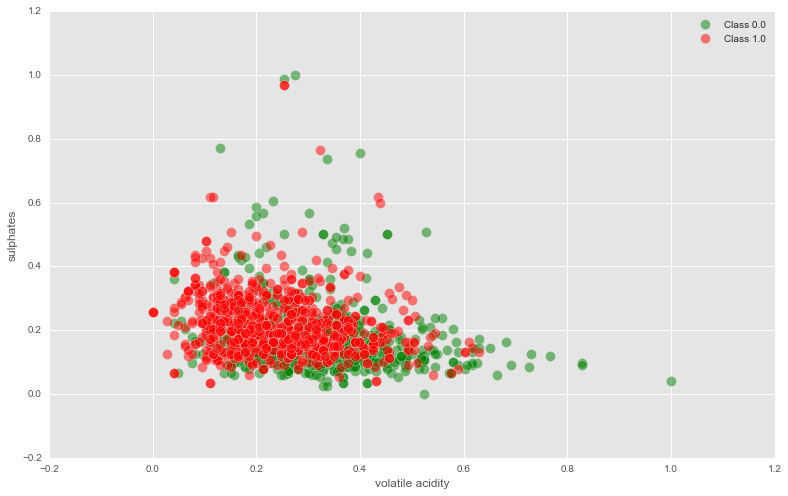

In [11]:
plot_data(size = 100, alpha = 0.5, x = 0, y = 1, color = ["green", "red", "blue", "purple", "black", "coral"])

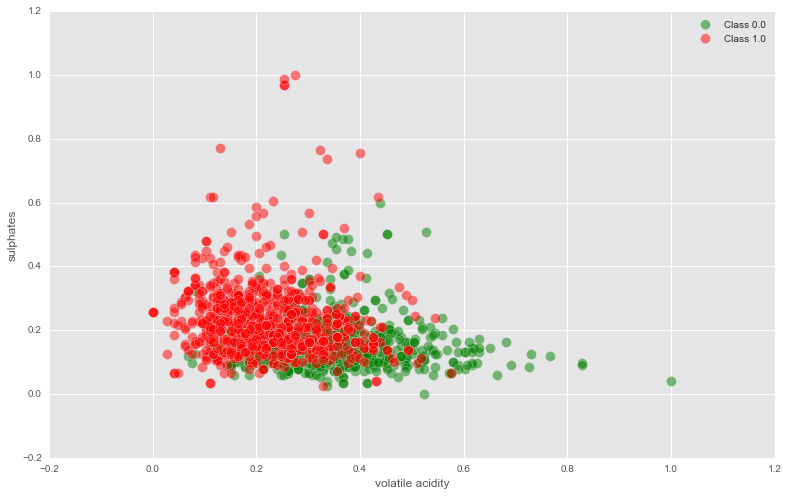

In [12]:
pred_plot(size = 100, alpha = 0.5, x = 0, y = 1, color = ["green", "red", "blue", "purple", "black", "coral"])

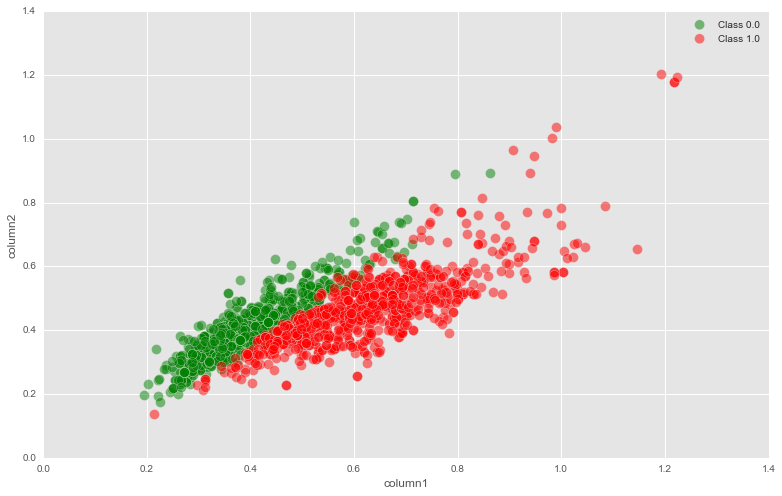

In [13]:
A1=[(0.25,0.6),(1,1),(0.8,0.25)]
project(plane = A1, size = 10, alpha = 1, x = 0, y = 1, color = ["green", "red", "blue", "purple", "black", "coral"])

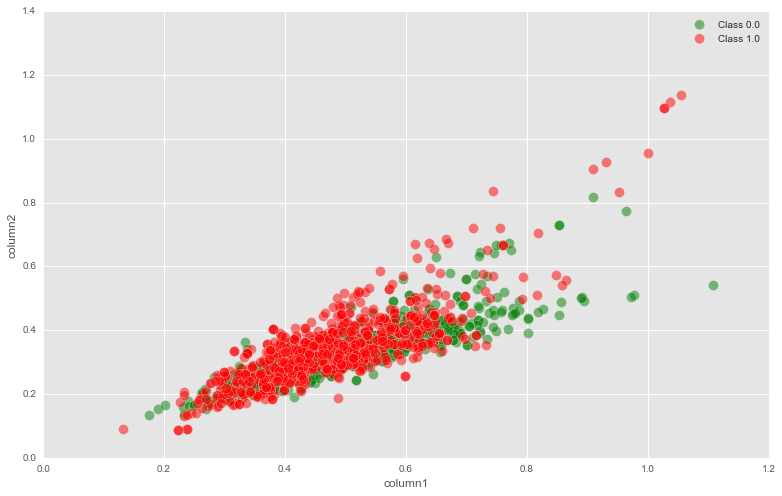

In [14]:
A1=[(1,0.5),(0.75,1),(0.2,0)]
project(plane = A1, size = 10, alpha = 1, x = 0, y = 1, color = ["green", "red", "blue", "purple", "black", "coral"])

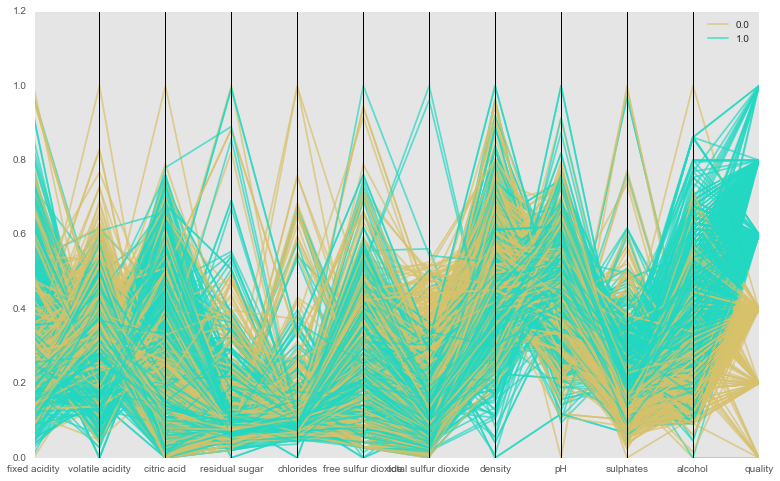

In [15]:
parallel_coordinates(df, 'category', alpha = 0.7)

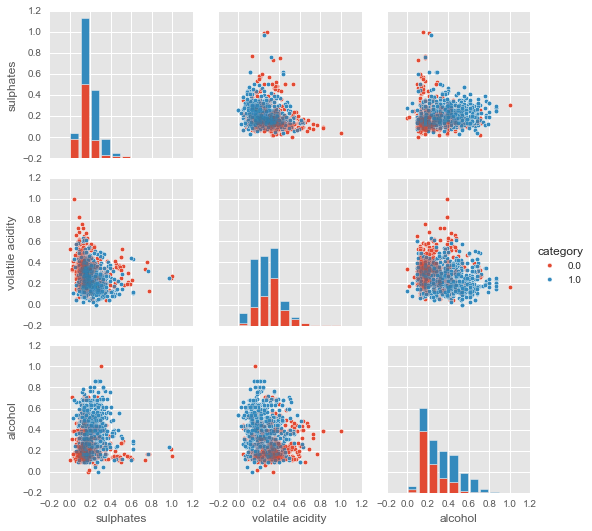

In [16]:
g=sn.pairplot(df, hue="category", vars = ["sulphates", "volatile acidity", "alcohol"])
g = g.map_offdiag(plt.scatter,  s = 10, alpha = 0.1)

In [17]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,0.0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,0.0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,0.0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,1.0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,0.0
5,0.247788,0.369863,0.00,0.061644,0.105175,0.169014,0.120141,0.567548,0.606299,0.137725,0.153846,0.4,0.0
6,0.292035,0.328767,0.06,0.047945,0.095159,0.197183,0.187279,0.464758,0.440945,0.077844,0.153846,0.4,0.0
7,0.238938,0.363014,0.00,0.020548,0.088481,0.197183,0.053004,0.332599,0.511811,0.083832,0.246154,0.8,1.0
8,0.283186,0.315068,0.02,0.075342,0.101836,0.112676,0.042403,0.494126,0.488189,0.143713,0.169231,0.8,1.0
9,0.256637,0.260274,0.36,0.356164,0.098497,0.225352,0.339223,0.567548,0.480315,0.281437,0.323077,0.4,0.0


In [22]:
df.loc[1,:]

fixed acidity           0.283186
volatile acidity        0.520548
citric acid             0.000000
residual sugar          0.116438
chlorides               0.143573
free sulfur dioxide     0.338028
total sulfur dioxide    0.215548
density                 0.494126
pH                      0.362205
sulphates               0.209581
alcohol                 0.215385
quality                 0.400000
category                0.000000
Name: 1, dtype: float64

In [23]:
df2 = df.loc[:500,:]

In [24]:
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,0.0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,0.0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,0.0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,1.0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,0.0
5,0.247788,0.369863,0.00,0.061644,0.105175,0.169014,0.120141,0.567548,0.606299,0.137725,0.153846,0.4,0.0
6,0.292035,0.328767,0.06,0.047945,0.095159,0.197183,0.187279,0.464758,0.440945,0.077844,0.153846,0.4,0.0
7,0.238938,0.363014,0.00,0.020548,0.088481,0.197183,0.053004,0.332599,0.511811,0.083832,0.246154,0.8,1.0
8,0.283186,0.315068,0.02,0.075342,0.101836,0.112676,0.042403,0.494126,0.488189,0.143713,0.169231,0.8,1.0
9,0.256637,0.260274,0.36,0.356164,0.098497,0.225352,0.339223,0.567548,0.480315,0.281437,0.323077,0.4,0.0


In [29]:
df3=pd.DataFrame()
df3['name']=['1','2']

In [30]:
df3

,name
0,1
1,2


In [31]:
df3['data']=[df,df2]

In [32]:
df3

,name,data
0,1,fixed acidity volatile acidity citric ...
1,2,fixed acidity volatile acidity citric a...


In [35]:
df3.loc[1]['data']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,0.0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,0.0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,0.0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,1.0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,0.0
5,0.247788,0.369863,0.00,0.061644,0.105175,0.169014,0.120141,0.567548,0.606299,0.137725,0.153846,0.4,0.0
6,0.292035,0.328767,0.06,0.047945,0.095159,0.197183,0.187279,0.464758,0.440945,0.077844,0.153846,0.4,0.0
7,0.238938,0.363014,0.00,0.020548,0.088481,0.197183,0.053004,0.332599,0.511811,0.083832,0.246154,0.8,1.0
8,0.283186,0.315068,0.02,0.075342,0.101836,0.112676,0.042403,0.494126,0.488189,0.143713,0.169231,0.8,1.0
9,0.256637,0.260274,0.36,0.356164,0.098497,0.225352,0.339223,0.567548,0.480315,0.281437,0.323077,0.4,0.0
